# Fast ion flows observed by the MMS FPI during a dayside reconnection event on March 24, 2023

This notebook shows how to create 2D slices of 3D particle data from the MMS Fast Plasma Investigation (FPI) instrument using PySPEDAS

Note: these routines are still being beta tested; please report potential issues to Jim Lewis, jwl@ssl.berkeley.edu

Use the previously cached MMS data by setting SPEDAS_DATA_DIR

In [1]:
# The following lines were needed for the summer school heliocloud environment
# import os
# os.environ["SPEDAS_DATA_DIR"] = "/home/jovyan/scratch_space/pyspedas_data"

# This line is necessary if you don't have pyspedas installed yet (e.g. Google Colab)
# You can comment these out if you already have a working pyspedas installation
# sunpy is needed for some MMS operations, and is not installed in the default pyspedas install

!pip install pyspedas
!pip install sunpy

In [2]:
import pyspedas
from pyspedas.projects.mms.particles.mms_part_slice2d import mms_part_slice2d

28-Jun-24 10:13:08: /Users/jwl/PycharmProjects/summer-school-24/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



This time was selected to coincide with magnetic field and ion flow reversals observed in MMS summary plot data.

In [3]:
time = '2023-03-24/07:07:33'

## FPI ions with geometric interpolation

The data are rotated such that the x axis is parallel to B field and the bulk velocity defines the x-y plane, and plotted using geometric interpolation (each point on the plot is given the value of the bin it intersects)

28-Jun-24 10:13:11: Downloading mms1_fpi_brst_l2_dis-dist_20230324070453_v3.4.0.cdf to pydata/mms1/fpi/brst/l2/dis-dist/2023/03/24
28-Jun-24 10:14:40: The name mms1_dis_pitchangdist_lowen_brst is currently not in pytplot
28-Jun-24 10:14:40: The name mms1_dis_pitchangdist_miden_brst is currently not in pytplot
28-Jun-24 10:14:40: The name mms1_dis_pitchangdist_highen_brst is currently not in pytplot
28-Jun-24 10:14:40: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
28-Jun-24 10:14:40: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
28-Jun-24 10:14:40: Problem reading the variable: mms1_des_compressionloss_brst_moms
28-Jun-24 10:14:40: The name mms1_dis_compressionloss_brst_moms is currently not in pytplot
28-Jun-24 10:14:40: The name mms1_dis_compressionloss_brst_moms is currently not in pytplot
28-Jun-24 10:14:40: Problem reading the variable: mms1_dis_compressionloss_brst_moms
28-Jun-24 10:14:40: The name mms1_des_compressionloss_brst_d

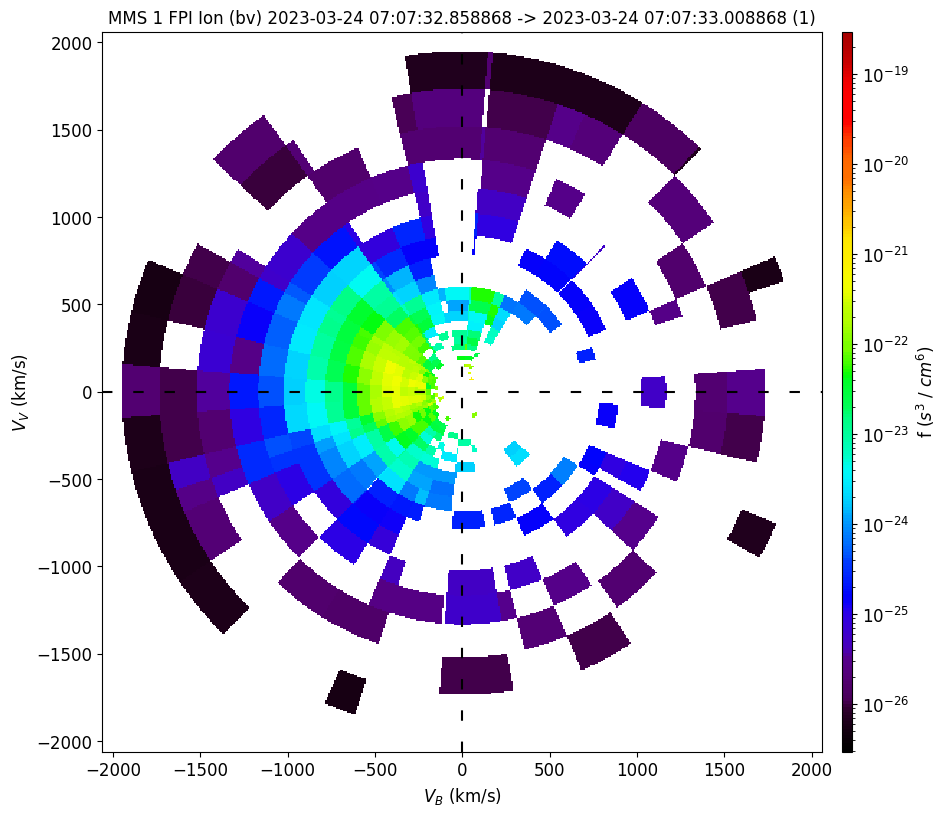

In [4]:
mms_part_slice2d(time=time, instrument='fpi', data_rate='brst', species='i', rotation='bv', erange=[0, 20000])

Return the slice data structure (instead of plotting) by setting the `return_slice` keyword to `True`

In [5]:
the_slice = mms_part_slice2d(return_slice=True, time=time, instrument='fpi', species='i', rotation='bv', erange=[0, 20000])

28-Jun-24 10:14:49: Loading pydata/mms1/fpi/fast/l2/dis-dist/2023/03/mms1_fpi_fast_l2_dis-dist_20230324060000_v3.4.0.cdf
28-Jun-24 10:14:51: The name mms1_dis_pitchangdist_lowen_fast is currently not in pytplot
28-Jun-24 10:14:51: The name mms1_dis_pitchangdist_miden_fast is currently not in pytplot
28-Jun-24 10:14:51: The name mms1_dis_pitchangdist_highen_fast is currently not in pytplot
28-Jun-24 10:14:53: Loading pydata/mms1/fgm/srvy/l2/2023/03/mms1_fgm_srvy_l2_20230324_v5.393.0.cdf
28-Jun-24 10:14:59: Loading pydata/mms1/fpi/fast/l2/dis-moms/2023/03/mms1_fpi_fast_l2_dis-moms_20230324060000_v3.4.0.cdf
28-Jun-24 10:14:59: The name mms1_dis_pitchangdist_lowen_fast is currently not in pytplot
28-Jun-24 10:14:59: The name mms1_dis_pitchangdist_miden_fast is currently not in pytplot
28-Jun-24 10:14:59: The name mms1_dis_pitchangdist_highen_fast is currently not in pytplot
28-Jun-24 10:14:59: Averaging mms1_fgm_b_gse_srvy_l2_bvec
28-Jun-24 10:14:59: Averaging mms1_dis_bulkv_gse_fast
28-Ju

The slice is stored as a dictionary:

In [6]:
the_slice.keys()

dict_keys(['project_name', 'spacecraft', 'data_name', 'units_name', 'species', 'xyunits', 'rotation', 'energy', 'trange', 'zrange', 'rrange', 'rlog', 'interpolation', 'n_samples', 'data', 'xgrid', 'ygrid'])

You can also create 1D cuts through the 2D slice:

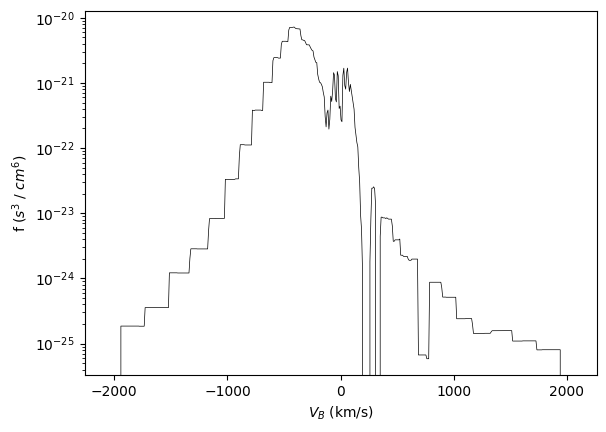

In [7]:
from pyspedas.particles.spd_slice2d.slice1d_plot import plot

plot(the_slice, 'x', [-100, 100])  # summed from Vv=[-100, 100]

## FPI ions with 2D interpolation

The data are rotated such that the x axis is parallel to B field and the bulk velocity defines the x-y plane, and plotted using 2D interpolation (data points within the specified theta or z-axis range are projected onto the slice plane and linearly interpolated onto a regular 2D grid). The default theta range is [-20, +20]

28-Jun-24 10:15:05: Loading pydata/mms1/fpi/brst/l2/dis-dist/2023/03/24/mms1_fpi_brst_l2_dis-dist_20230324070453_v3.4.0.cdf
28-Jun-24 10:15:06: The name mms1_dis_pitchangdist_lowen_brst is currently not in pytplot
28-Jun-24 10:15:06: The name mms1_dis_pitchangdist_miden_brst is currently not in pytplot
28-Jun-24 10:15:06: The name mms1_dis_pitchangdist_highen_brst is currently not in pytplot
28-Jun-24 10:15:06: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
28-Jun-24 10:15:06: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
28-Jun-24 10:15:06: Problem reading the variable: mms1_des_compressionloss_brst_moms
28-Jun-24 10:15:06: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
28-Jun-24 10:15:06: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
28-Jun-24 10:15:06: Problem reading the variable: mms1_des_compressionloss_brst_dist
28-Jun-24 10:15:08: Loading pydata/mms1/fgm/brst/l2/2023/03/24/mms1

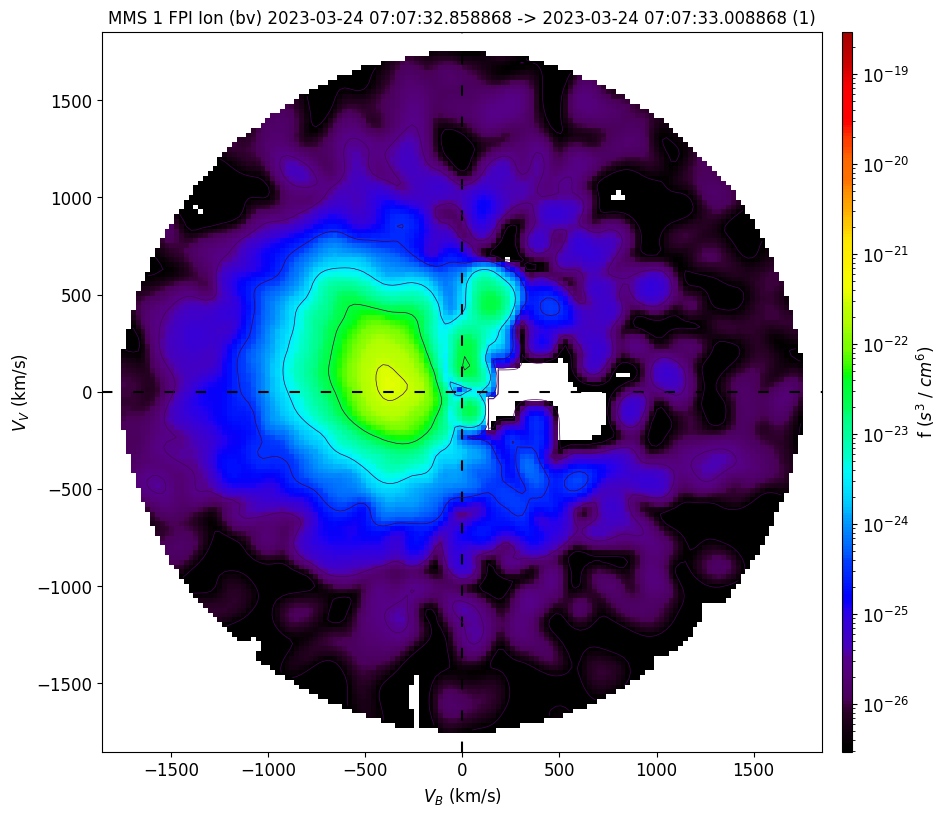

In [8]:
mms_part_slice2d(interpolation='2d', time=time, instrument='fpi', data_rate='brst', species='i', rotation='bv', erange=[0, 20000])

To see the other options, run help() on mms_part_slice2d:

In [9]:
help(mms_part_slice2d)

Help on function mms_part_slice2d in module pyspedas.mms.particles.mms_part_slice2d:

mms_part_slice2d(trange=None, time=None, samples=None, window=None, center_time=False, erange=None, thetarange=None, zdirrange=None, average_angle=None, sum_angle=None, energy=False, log=False, probe='1', instrument='fpi', data_rate=None, level='l2', spdf=False, mag_data_rate=None, species=None, rotation='xy', custom_rotation=None, slice_x=None, slice_norm=None, subtract_bulk=False, xrange=None, yrange=None, zrange=None, resolution=None, interpolation='geometric', contours=False, title=None, smooth=None, save_jpeg=None, save_png=None, save_svg=None, save_pdf=None, save_eps=None, plotsize=10, dpi=None, return_slice=False, cmap=None, display=True)
    This routine creates 2D slices of 3D distribution function data from the FPI and HPCA instruments.
    This is essentially a wrapper around slice2d and slice2d_plot, that loads the data,
    any required support data, calculates the slice with slice2d and 

We'll look at the same slice, this time with the 'be' rotation specified

28-Jun-24 10:15:13: Loading pydata/mms1/fpi/brst/l2/dis-dist/2023/03/24/mms1_fpi_brst_l2_dis-dist_20230324070453_v3.4.0.cdf
28-Jun-24 10:15:14: The name mms1_dis_pitchangdist_lowen_brst is currently not in pytplot
28-Jun-24 10:15:14: The name mms1_dis_pitchangdist_miden_brst is currently not in pytplot
28-Jun-24 10:15:14: The name mms1_dis_pitchangdist_highen_brst is currently not in pytplot
28-Jun-24 10:15:14: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
28-Jun-24 10:15:14: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
28-Jun-24 10:15:14: Problem reading the variable: mms1_des_compressionloss_brst_moms
28-Jun-24 10:15:14: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
28-Jun-24 10:15:14: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
28-Jun-24 10:15:14: Problem reading the variable: mms1_des_compressionloss_brst_dist
28-Jun-24 10:15:16: Loading pydata/mms1/fgm/brst/l2/2023/03/24/mms1

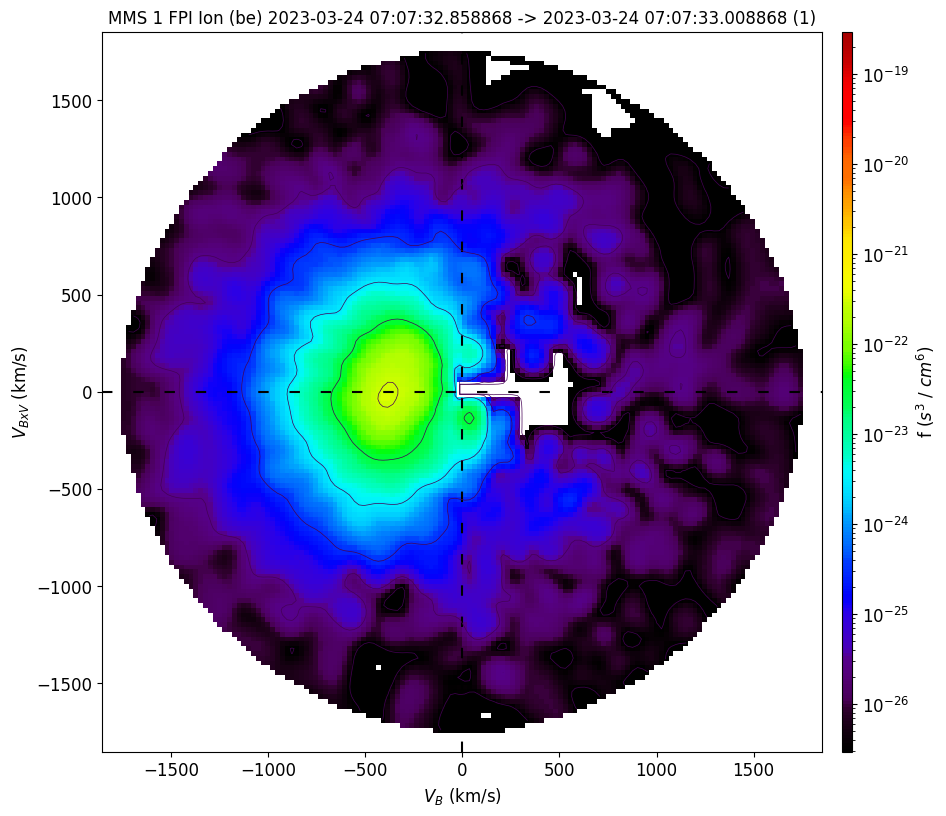

In [10]:
mms_part_slice2d(interpolation='2d', time='2023-03-24 07:07:33', instrument='fpi', species='i',rotation='be', data_rate='brst', erange=[0, 20000])


The next slice is taken about 22 seconds later. By this time, the bulk velocity has decreased, and the beam structure seems less defined.  

28-Jun-24 10:15:21: Loading pydata/mms1/fpi/brst/l2/dis-dist/2023/03/24/mms1_fpi_brst_l2_dis-dist_20230324070453_v3.4.0.cdf
28-Jun-24 10:15:22: The name mms1_dis_pitchangdist_lowen_brst is currently not in pytplot
28-Jun-24 10:15:22: The name mms1_dis_pitchangdist_miden_brst is currently not in pytplot
28-Jun-24 10:15:22: The name mms1_dis_pitchangdist_highen_brst is currently not in pytplot
28-Jun-24 10:15:22: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
28-Jun-24 10:15:22: The name mms1_des_compressionloss_brst_moms is currently not in pytplot
28-Jun-24 10:15:22: Problem reading the variable: mms1_des_compressionloss_brst_moms
28-Jun-24 10:15:22: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
28-Jun-24 10:15:22: The name mms1_des_compressionloss_brst_dist is currently not in pytplot
28-Jun-24 10:15:22: Problem reading the variable: mms1_des_compressionloss_brst_dist
28-Jun-24 10:15:24: Loading pydata/mms1/fgm/brst/l2/2023/03/24/mms1

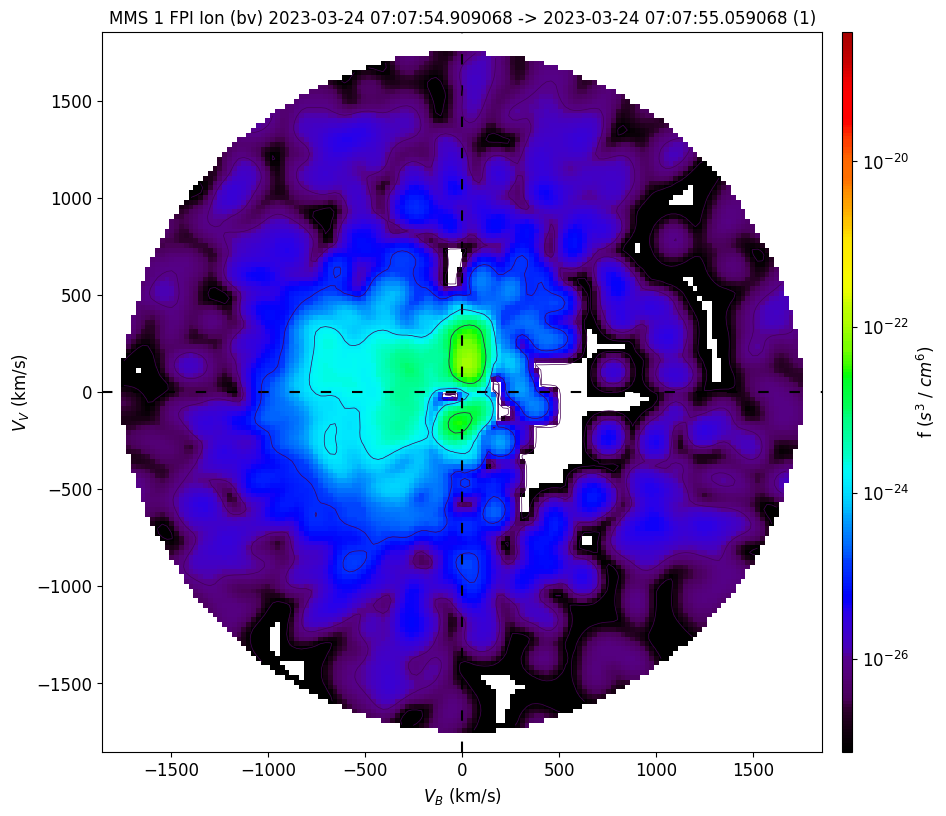

In [11]:
mms_part_slice2d(interpolation='2d', time='2023-03-24 07:07:55', instrument='fpi', species='i',rotation='bv', data_rate='brst', erange=[0, 20000])
